In [2]:
ls

data_cleaning.ipynb        scraping.ipynb        Unscrapped_df.csv
EDA.ipynb                  test_df.csv           Unscrapped_test_df.csv
main.py                    test_results_df.csv   updated_test_data.csv
mle-1-assign-dataset.xlsx  train_df.csv          updated_train_data.csv
results_df.csv             train_results_df.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
import nltk
from nltk.stem.porter import PorterStemmer
import string
from nltk.corpus import stopwords
# string.punctuation

In [4]:
train_df = pd.read_csv('train_df.csv')

In [5]:
train_df.shape

(1197, 2)

In [6]:
train_df.head()

,datasheet_link,target_col
0,https://lfillumination.com/files/specsheets/EF...,lighting
1,https://lfillumination.com/files/specsheets/EF...,lighting
2,https://lfillumination.com/files/specsheets/EF...,lighting
3,https://www.waclighting.com/storage/waclightin...,lighting
4,https://www.acuitybrands.com/api/products/geta...,lighting


In [7]:
train_df.isnull().sum()

datasheet_link    0
target_col        0
dtype: int64

In [10]:
train_df_scrapped = pd.read_csv('updated_train_data.csv')

In [11]:
train_df_scrapped.head()

,index,url,content
0,0,https://lfillumination.com/files/specsheets/EF...,| ILLUMINATION Magnate Moun ...
1,1,https://lfillumination.com/files/specsheets/EF...,NaN
2,2,https://lfillumination.com/files/specsheets/EF...,| EF400 System # EF407B . DIE CAST CYLINDRICAL...
3,3,https://www.waclighting.com/storage/waclightin...,ADJUSTABLE BEAM WALL WASH 12V 5221 vba alight ...
4,4,https://www.acuitybrands.com/api/products/geta...,HEALTHCARE mons Wa LIGHTING. | HDMC Surface Mo...


In [12]:
train_df_scrapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    1197 non-null   int64 
 1   url      1197 non-null   object
 2   content  952 non-null    object
dtypes: int64(1), object(2)
memory usage: 28.2+ KB


In [14]:
train_df_fulll = pd.merge(train_df, train_df_scrapped, left_on='datasheet_link', right_on='url', how='left')

In [15]:
train_df_fulll.head()

,datasheet_link,target_col,index,url,content
0,https://lfillumination.com/files/specsheets/EF...,lighting,0,https://lfillumination.com/files/specsheets/EF...,| ILLUMINATION Magnate Moun ...
1,https://lfillumination.com/files/specsheets/EF...,lighting,1,https://lfillumination.com/files/specsheets/EF...,NaN
2,https://lfillumination.com/files/specsheets/EF...,lighting,2,https://lfillumination.com/files/specsheets/EF...,| EF400 System # EF407B . DIE CAST CYLINDRICAL...
3,https://www.waclighting.com/storage/waclightin...,lighting,3,https://www.waclighting.com/storage/waclightin...,ADJUSTABLE BEAM WALL WASH 12V 5221 vba alight ...
4,https://www.acuitybrands.com/api/products/geta...,lighting,4,https://www.acuitybrands.com/api/products/geta...,HEALTHCARE mons Wa LIGHTING. | HDMC Surface Mo...


In [17]:
train_df_fulll = train_df_fulll.drop(columns=['index','url'],axis=1)

In [20]:
train_df_fulll.to_csv("train_df_full.csv",index=False)

In [21]:
test_df = pd.read_excel("mle-1-assign-dataset.xlsx",sheet_name='test_data')

In [25]:
test_df[test_df.duplicated(subset=['datasheet_link'])]

,datasheet_link,target_col
103,https://www.littelfuse.com/media?resourcetype=...,fuses
105,https://www.littelfuse.com/media?resourcetype=...,fuses
109,https://www.littelfuse.com/media?resourcetype=...,fuses
113,https://www.littelfuse.com/media?resourcetype=...,fuses
115,https://www.littelfuse.com/media?resourcetype=...,fuses
...,...,...
389,https://www.alphawire.com/products/cable/alpha...,cable
390,https://www.alphawire.com/disteAPI/SpecPDF/Dow...,cable
391,https://prysmian-group.dcatalog.com/v/Electron...,cable
396,https://html5.dcatalog.com/?docid=8e9daddd-82b...,cable


In [27]:
test_df.drop_duplicates(subset=['datasheet_link'],inplace=True)

In [30]:
test_df.to_csv('test_df.csv',index=False)

In [31]:
test_scrapped = pd.read_csv('updated_test_data.csv')

In [32]:
test_scrapped.head()

,index,url,content
0,0,https://lumenart.com/images/alume/awl-01_specs...,| Lumen rt AWL.O1 Optional...
1,1,https://lumenart.com/images/fabric/rdc/rdc_spe...,LumenArt LIGHTING SOLUTIONS. uu) RDC Series ...
2,2,https://lumenart.com/images/fabric/cyp/cyp_spe...,LumenAvrt CYP Series 3 SOLUTIONS CYP8x24 CY...
3,3,https://lumenart.com/images/designer/wlp_specs...,LumenArt WLP LIGHTING SOLUTIONS SPECIFICATIO...
4,4,https://lumenart.com/images/designer/wcp/wcp-s...,LumenArt WCP-S LIGHTING SOLUTIONS 43% Oak ...


In [34]:
test_df_full = pd.merge(test_df, test_scrapped, left_on='datasheet_link', right_on='url', how='left')

In [35]:
test_df_full.head()

,datasheet_link,target_col,index,url,content
0,https://lumenart.com/images/alume/awl-01_specs...,lighting,0,https://lumenart.com/images/alume/awl-01_specs...,| Lumen rt AWL.O1 Optional...
1,https://lumenart.com/images/fabric/rdc/rdc_spe...,lighting,1,https://lumenart.com/images/fabric/rdc/rdc_spe...,LumenArt LIGHTING SOLUTIONS. uu) RDC Series ...
2,https://lumenart.com/images/fabric/cyp/cyp_spe...,lighting,2,https://lumenart.com/images/fabric/cyp/cyp_spe...,LumenAvrt CYP Series 3 SOLUTIONS CYP8x24 CY...
3,https://lumenart.com/images/designer/wlp_specs...,lighting,3,https://lumenart.com/images/designer/wlp_specs...,LumenArt WLP LIGHTING SOLUTIONS SPECIFICATIO...
4,https://lumenart.com/images/designer/wcp/wcp-s...,lighting,4,https://lumenart.com/images/designer/wcp/wcp-s...,LumenArt WCP-S LIGHTING SOLUTIONS 43% Oak ...


In [37]:
test_df_full = test_df_full.drop(columns=['index','url'])

In [38]:
test_df_full.to_csv('test_df_full.csv',index=False)

# EDA


In [39]:
train_df = train_df_fulll.copy()

In [40]:
train_df.head()

,datasheet_link,target_col,content
0,https://lfillumination.com/files/specsheets/EF...,lighting,| ILLUMINATION Magnate Moun ...
1,https://lfillumination.com/files/specsheets/EF...,lighting,NaN
2,https://lfillumination.com/files/specsheets/EF...,lighting,| EF400 System # EF407B . DIE CAST CYLINDRICAL...
3,https://www.waclighting.com/storage/waclightin...,lighting,ADJUSTABLE BEAM WALL WASH 12V 5221 vba alight ...
4,https://www.acuitybrands.com/api/products/geta...,lighting,HEALTHCARE mons Wa LIGHTING. | HDMC Surface Mo...


In [42]:
train_df.isnull().sum()

datasheet_link      0
target_col          0
content           245
dtype: int64

In [47]:
train_df['target_col'].value_counts()

target_col
lighting    446
cable       226
others      155
fuses       125
Name: count, dtype: int64

In [45]:
# dropping null rows
train_df = train_df.dropna()

In [48]:
train_df.head()

,datasheet_link,target_col,content
0,https://lfillumination.com/files/specsheets/EF...,lighting,| ILLUMINATION Magnate Moun ...
2,https://lfillumination.com/files/specsheets/EF...,lighting,| EF400 System # EF407B . DIE CAST CYLINDRICAL...
3,https://www.waclighting.com/storage/waclightin...,lighting,ADJUSTABLE BEAM WALL WASH 12V 5221 vba alight ...
4,https://www.acuitybrands.com/api/products/geta...,lighting,HEALTHCARE mons Wa LIGHTING. | HDMC Surface Mo...
6,https://lfillumination.com/files/specsheets/KA...,lighting,iF KATRPB CYLINDER PENDANT MOUNT ILLUMINATION ...


In [49]:
train_df.shape

(952, 3)

In [53]:
data = train_df['target_col'].value_counts().reset_index()
data

,target_col,count
0,lighting,446
1,cable,226
2,others,155
3,fuses,125


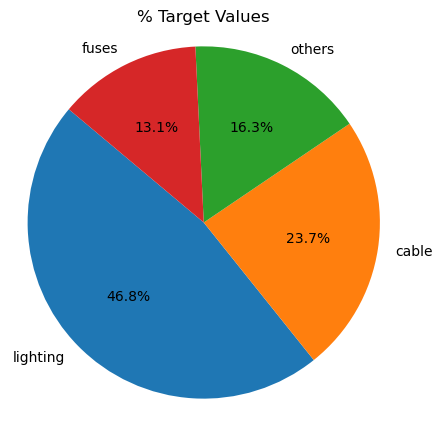

In [58]:
# Plot
plt.figure(figsize=(5, 5))  # Optional: adjust the size of the figure
plt.pie(data['count'],labels=data['target_col'], autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Show the plot
plt.title('% Target Values')
plt.show()

In [59]:
# link preprocessing
train_df.loc[0,'datasheet_link']

'https://lfillumination.com/files/specsheets/EF408B-Light-Unit.pdf'

In [81]:
def link_preprocessor(link):
    if link:
        link = " ".join([str_.strip() for str_ in link.split('/') if str_.strip() and ("http" not in str_ and 'www' not in str_)])
        return link
    else:
        return ""

In [82]:
link = 'https:/www.//lfillumination.com/files/specsheets/EF408B-Light-Unit.pdf'

In [83]:
link_preprocessor(link)

'lfillumination.com files specsheets EF408B-Light-Unit.pdf'

In [85]:
train_df['datasheet_link_processed']= train_df['datasheet_link'].apply(link_preprocessor)

In [86]:
train_df.head()

,datasheet_link,target_col,content,datasheet_link_processed
0,https://lfillumination.com/files/specsheets/EF...,lighting,| ILLUMINATION Magnate Moun ...,lfillumination.com files specsheets EF408B-Lig...
2,https://lfillumination.com/files/specsheets/EF...,lighting,| EF400 System # EF407B . DIE CAST CYLINDRICAL...,lfillumination.com files specsheets EF407B-Lig...
3,https://www.waclighting.com/storage/waclightin...,lighting,ADJUSTABLE BEAM WALL WASH 12V 5221 vba alight ...,storage waclighting-images specsheet_pdf 5221_...
4,https://www.acuitybrands.com/api/products/geta...,lighting,HEALTHCARE mons Wa LIGHTING. | HDMC Surface Mo...,api products getasset healthcare-lighting 1626...
6,https://lfillumination.com/files/specsheets/KA...,lighting,iF KATRPB CYLINDER PENDANT MOUNT ILLUMINATION ...,lfillumination.com files specsheets KATRPB-Pen...


In [89]:
print(train_df['content'].sample().values)

['   t Metalux LBLED Low Bay Linear Series Asymmetric Distribution   Inari Cane TTS Prout Certo esc ae BQ%ea rca eet eS Product Features   Top Product Features + Die formed CRS housing painted after fabrication for added durability + High impact optical lens protects LEDs + Available lumen packages upto 22,000 lumens + High Performance eficacy up to 154 ImW + Asymmetric distribution i deal for leading docks + Impact protection rating IKO9 Lens and IKO8 Housing + Options ta meet Buy American and other domestic preference requirements Dimensional and Mounting Details    @coopeER os \x0c Metalux Teg Order Information                Pecans   Soren    \x0c Metalux Teg Product Specifications Sct *Gegetetattttiew   Seren irgore onary Photometric Data            Energy and Performance Data xray an Patrice Ont Clay Mente   Sypiesen brent {ergot een econ, {Reno ae tatingserorane Promteditei cos ews he cap      epee aco inatsen   "ihe pe of btn ah we tee cerry that  epttreet manent   Saiablosr cr

In [91]:
train_df["link_num_char"] =  train_df["datasheet_link"].apply(len)

In [94]:
train_df["num_link_words"] = train_df["datasheet_link"].apply(lambda x: len(nltk.word_tokenize(x)))

In [95]:
train_df["num_link_sent"] = train_df["datasheet_link"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [98]:
train_df.head()

,datasheet_link,target_col,content,datasheet_link_processed,link_num_char,num_link_words,num_link_sent
0,https://lfillumination.com/files/specsheets/EF...,lighting,| ILLUMINATION Magnate Moun ...,lfillumination.com files specsheets EF408B-Lig...,65,3,1
2,https://lfillumination.com/files/specsheets/EF...,lighting,| EF400 System # EF407B . DIE CAST CYLINDRICAL...,lfillumination.com files specsheets EF407B-Lig...,65,3,1
3,https://www.waclighting.com/storage/waclightin...,lighting,ADJUSTABLE BEAM WALL WASH 12V 5221 vba alight ...,storage waclighting-images specsheet_pdf 5221_...,83,3,1
4,https://www.acuitybrands.com/api/products/geta...,lighting,HEALTHCARE mons Wa LIGHTING. | HDMC Surface Mo...,api products getasset healthcare-lighting 1626...,184,15,1
6,https://lfillumination.com/files/specsheets/KA...,lighting,iF KATRPB CYLINDER PENDANT MOUNT ILLUMINATION ...,lfillumination.com files specsheets KATRPB-Pen...,62,3,1


In [99]:
train_df[['link_num_char',"num_link_words","num_link_sent"]].describe()

,link_num_char,num_link_words,num_link_sent
count,952.000000,952.000000,952.0
mean,92.998950,5.573529,1.0
std,40.932801,3.873235,0.0
min,39.000000,3.000000,1.0
25%,61.750000,3.000000,1.0
50%,80.000000,3.000000,1.0
75%,110.000000,7.000000,1.0
max,221.000000,19.000000,1.0


In [110]:
# finding max length link
max_len_index = train_df['link_num_char'].idxmax()
train_df.loc[max_len_index].values

array(['https://lithonia.acuitybrands.com/api/products/getasset/lithonia-lighting/1250116/b7274111-9af8-4298-8280-c23960cd45e7/barnguard-contractor-select-spec-sheet.pdf?abl_version=02%2f28%2f2023+18%3a13%3a38&DOC_Type=SPEC_SHEET',
       'lighting',
       'toggle menu How to Buy US and Canada Sales Mexico Sales International Sales About About Lithonia Acuity Brands Terms & Conditions Warranty Contact Us Login Login/Register How to Buy Contact Us Products Products Back Products View All Products Design Select Contractor Select Commercial Indoor Commercial Indoor Back Commercial Indoor Panels Troffers Cylinders Wall Brackets Strip Lights Linear Wraparounds Commercial Downlights Shop Lights Retrofit LED Troffers Industrial Contractor Select nLight AIR Retrofit LED Retrofit LED Back Retrofit LED Residential Commercial Strip Lights Troffers Tube Conversion Kit Residential Track Residential Track Back Residential Track Track Heads / Kits Track Accessories Fixed Track Decorative & Residenti

In [111]:
# finding max word link
max_len_index = train_df['num_link_words'].idxmax()
train_df.loc[max_len_index].values

array(['https://www.te.com/commerce/DocumentDelivery/DDEController?Action=showdoc&DocId=Specification+Or+Standard%7FSPEC1200%7F16%7Fpdf%7FEnglish%7FENG_SS_SPEC1200_16.pdf%7F945519-000',
       'cable',
       '   SPECIFICATION: 1200 Se THis ISSUE: sous 16 = Dare 20 Sep 2010 Raychem Wire and Cable REPLACES: tasue 15 50 Cnet Avene, edood Oy CA 84059990 PAGE: sot40 14 12 CABLE, HIGH-FREQUENCY AND CONTROLLED ELECTRICAL  SCOPE SCOPE This specification covers inspection methods, procedures and requirements for high-frequency and controlled electrical cables,  TEMPERATURE RATING The temperature rating, when shown on the specification sheet, is based on data obtained fom cither testing of the insulation materil(s) using the mechanical and electrical integrity ofthe product as defined by ASTM D 3032, Section 14, asthe basis fr the rating, or by industry~ Sefined standards forthe type of material. The temperature ating is not based on passible changes tothe electrical characteristics ofthe cable

In [113]:
nltk.word_tokenize('https://www.te.com/commerce/DocumentDelivery/DDEController?Action=showdoc&DocId=Specification+Or+Standard%7FSPEC1200%7F16%7Fpdf%7FEnglish%7FENG_SS_SPEC1200_16.pdf%7F945519-000')

['https',
 ':',
 '//www.te.com/commerce/DocumentDelivery/DDEController',
 '?',
 'Action=showdoc',
 '&',
 'DocId=Specification+Or+Standard',
 '%',
 '7FSPEC1200',
 '%',
 '7F16',
 '%',
 '7Fpdf',
 '%',
 '7FEnglish',
 '%',
 '7FENG_SS_SPEC1200_16.pdf',
 '%',
 '7F945519-000']

In [116]:

train_df["content_num_char"] =  train_df["content"].apply(len)
train_df.head()


,datasheet_link,target_col,content,datasheet_link_processed,link_num_char,num_link_words,num_link_sent,content_num_char
0,https://lfillumination.com/files/specsheets/EF...,lighting,| ILLUMINATION Magnate Moun ...,lfillumination.com files specsheets EF408B-Lig...,65,3,1,350
2,https://lfillumination.com/files/specsheets/EF...,lighting,| EF400 System # EF407B . DIE CAST CYLINDRICAL...,lfillumination.com files specsheets EF407B-Lig...,65,3,1,475
3,https://www.waclighting.com/storage/waclightin...,lighting,ADJUSTABLE BEAM WALL WASH 12V 5221 vba alight ...,storage waclighting-images specsheet_pdf 5221_...,83,3,1,935
4,https://www.acuitybrands.com/api/products/geta...,lighting,HEALTHCARE mons Wa LIGHTING. | HDMC Surface Mo...,api products getasset healthcare-lighting 1626...,184,15,1,5106
6,https://lfillumination.com/files/specsheets/KA...,lighting,iF KATRPB CYLINDER PENDANT MOUNT ILLUMINATION ...,lfillumination.com files specsheets KATRPB-Pen...,62,3,1,379


In [118]:
train_df["num_content_words"] =  train_df["content"].apply(lambda x: len(nltk.word_tokenize(x)))


In [120]:
train_df["num_content_sent"] = train_df["content"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [121]:
train_df.head()

,datasheet_link,target_col,content,datasheet_link_processed,link_num_char,num_link_words,num_link_sent,content_num_char,num_content_words,num_content_sent
0,https://lfillumination.com/files/specsheets/EF...,lighting,| ILLUMINATION Magnate Moun ...,lfillumination.com files specsheets EF408B-Lig...,65,3,1,350,53,2
2,https://lfillumination.com/files/specsheets/EF...,lighting,| EF400 System # EF407B . DIE CAST CYLINDRICAL...,lfillumination.com files specsheets EF407B-Lig...,65,3,1,475,82,3
3,https://www.waclighting.com/storage/waclightin...,lighting,ADJUSTABLE BEAM WALL WASH 12V 5221 vba alight ...,storage waclighting-images specsheet_pdf 5221_...,83,3,1,935,153,3
4,https://www.acuitybrands.com/api/products/geta...,lighting,HEALTHCARE mons Wa LIGHTING. | HDMC Surface Mo...,api products getasset healthcare-lighting 1626...,184,15,1,5106,973,14
6,https://lfillumination.com/files/specsheets/KA...,lighting,iF KATRPB CYLINDER PENDANT MOUNT ILLUMINATION ...,lfillumination.com files specsheets KATRPB-Pen...,62,3,1,379,77,2


In [122]:
train_df[['content_num_char',"num_content_words","num_content_sent"]].describe()

,content_num_char,num_content_words,num_content_sent
count,952.000000,952.000000,952.000000
mean,2375.463235,426.532563,7.545168
std,4302.324756,748.562930,20.646849
min,5.000000,0.000000,0.000000
25%,627.750000,112.750000,2.000000
50%,1235.000000,232.000000,4.000000
75%,2845.750000,549.000000,7.000000
max,76052.000000,13336.000000,376.000000


In [126]:
max_len_index = train_df['content_num_char'].idxmax()
train_df.loc[max_len_index].values

array(['https://www.te.com/commerce/DocumentDelivery/DDEController?Action=srchrtrv&DocNm=SPEC1200&DocType=SS&DocLang=EN',
       'cable',
       '   SPECIFICATION: 1200 Se THis ISSUE: sous 16 = Dare 20 Sep 2010 Raychem Wire and Cable REPLACES: tasue 15 50 Cnet Avene, edood Oy CA 84059990 PAGE: sot40 14 12 CABLE, HIGH-FREQUENCY AND CONTROLLED ELECTRICAL  SCOPE SCOPE This specification covers inspection methods, procedures and requirements for high-frequency and controlled electrical cables,  TEMPERATURE RATING The temperature rating, when shown on the specification sheet, is based on data obtained fom cither testing of the insulation materil(s) using the mechanical and electrical integrity ofthe product as defined by ASTM D 3032, Section 14, asthe basis fr the rating, or by industry~ Sefined standards forthe type of material. The temperature ating is not based on passible changes tothe electrical characteristics ofthe cable which might occur a a result of exposure to temperature extreme

In [128]:
max_len_index = train_df['num_content_words'].idxmax()
train_df.loc[max_len_index].values

array(['https://www.te.com/commerce/DocumentDelivery/DDEController?Action=srchrtrv&DocNm=SPEC1200&DocType=SS&DocLang=EN',
       'cable',
       '   SPECIFICATION: 1200 Se THis ISSUE: sous 16 = Dare 20 Sep 2010 Raychem Wire and Cable REPLACES: tasue 15 50 Cnet Avene, edood Oy CA 84059990 PAGE: sot40 14 12 CABLE, HIGH-FREQUENCY AND CONTROLLED ELECTRICAL  SCOPE SCOPE This specification covers inspection methods, procedures and requirements for high-frequency and controlled electrical cables,  TEMPERATURE RATING The temperature rating, when shown on the specification sheet, is based on data obtained fom cither testing of the insulation materil(s) using the mechanical and electrical integrity ofthe product as defined by ASTM D 3032, Section 14, asthe basis fr the rating, or by industry~ Sefined standards forthe type of material. The temperature ating is not based on passible changes tothe electrical characteristics ofthe cable which might occur a a result of exposure to temperature extreme

In [129]:
max_len_index = train_df['num_content_sent'].idxmax()
train_df.loc[max_len_index].values

array(['https://www.te.com/commerce/DocumentDelivery/DDEController?Action=srchrtrv&DocNm=SPEC1200&DocType=SS&DocLang=EN',
       'cable',
       '   SPECIFICATION: 1200 Se THis ISSUE: sous 16 = Dare 20 Sep 2010 Raychem Wire and Cable REPLACES: tasue 15 50 Cnet Avene, edood Oy CA 84059990 PAGE: sot40 14 12 CABLE, HIGH-FREQUENCY AND CONTROLLED ELECTRICAL  SCOPE SCOPE This specification covers inspection methods, procedures and requirements for high-frequency and controlled electrical cables,  TEMPERATURE RATING The temperature rating, when shown on the specification sheet, is based on data obtained fom cither testing of the insulation materil(s) using the mechanical and electrical integrity ofthe product as defined by ASTM D 3032, Section 14, asthe basis fr the rating, or by industry~ Sefined standards forthe type of material. The temperature ating is not based on passible changes tothe electrical characteristics ofthe cable which might occur a a result of exposure to temperature extreme

In [131]:
train_df['target_col'].value_counts()

target_col
lighting    446
cable       226
others      155
fuses       125
Name: count, dtype: int64

/home/muhliscm/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/muhliscm/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/muhliscm/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/muhliscm/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

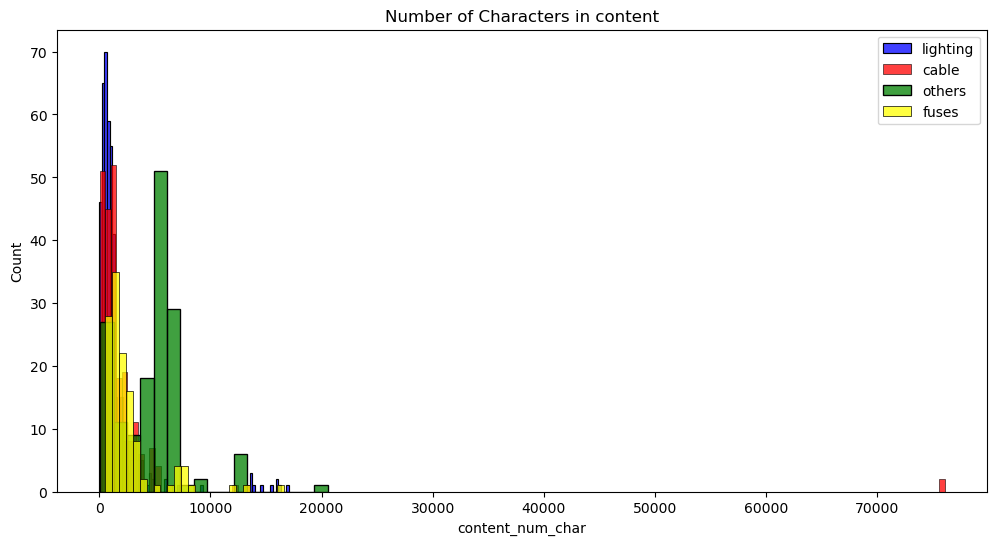

In [133]:
plt.figure(figsize=(12, 6))
plt.title("Number of Characters in content")
sns.histplot(train_df[train_df["target_col"] == 'lighting']["content_num_char"], color='blue',label="lighting")
sns.histplot(train_df[train_df["target_col"] == 'cable']["content_num_char"], color='red', label="cable")
sns.histplot(train_df[train_df["target_col"] == 'others']["content_num_char"], color='green', label="others")
sns.histplot(train_df[train_df["target_col"] == 'fuses']["content_num_char"], color='yellow', label="fuses")
plt.savefig("Number of Characters In content")
plt.legend()

/home/muhliscm/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/muhliscm/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/muhliscm/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/muhliscm/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

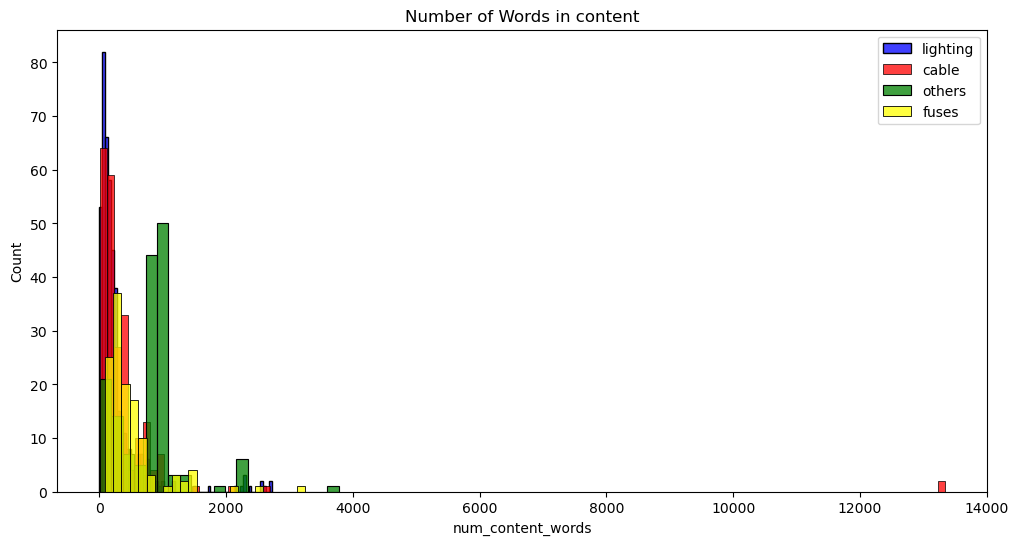

In [134]:
plt.figure(figsize=(12, 6))
plt.title("Number of Words in content")
sns.histplot(train_df[train_df["target_col"] == 'lighting']["num_content_words"], color='blue',label="lighting")
sns.histplot(train_df[train_df["target_col"] == 'cable']["num_content_words"], color='red', label="cable")
sns.histplot(train_df[train_df["target_col"] == 'others']["num_content_words"], color='green', label="others")
sns.histplot(train_df[train_df["target_col"] == 'fuses']["num_content_words"], color='yellow', label="fuses")
plt.savefig("Number of Words In content")
plt.legend()

/home/muhliscm/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/muhliscm/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/muhliscm/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/muhliscm/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

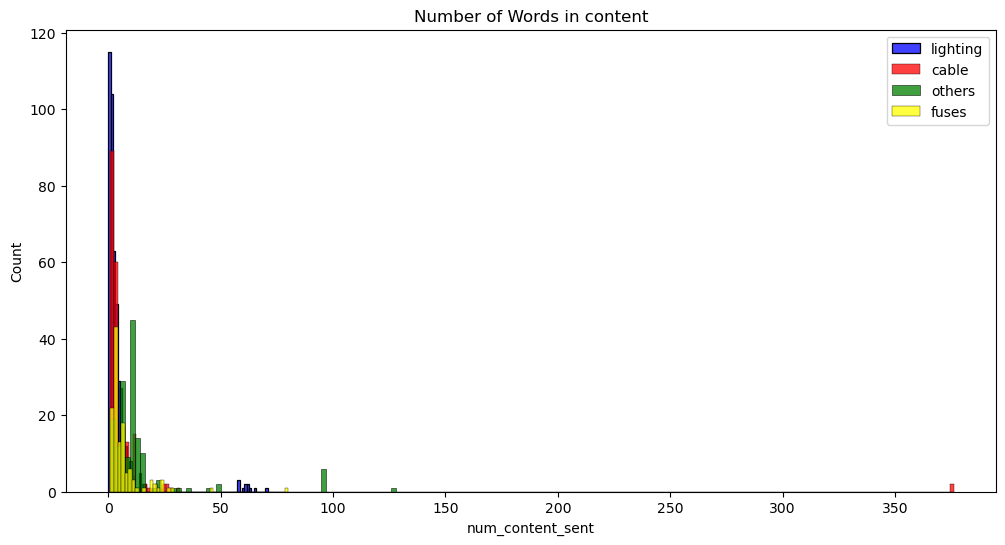

In [135]:
plt.figure(figsize=(12, 6))
plt.title("Number of Words in content")
sns.histplot(train_df[train_df["target_col"] == 'lighting']["num_content_sent"], color='blue',label="lighting")
sns.histplot(train_df[train_df["target_col"] == 'cable']["num_content_sent"], color='red', label="cable")
sns.histplot(train_df[train_df["target_col"] == 'others']["num_content_sent"], color='green', label="others")
sns.histplot(train_df[train_df["target_col"] == 'fuses']["num_content_sent"], color='yellow', label="fuses")
plt.savefig("Number of Words In content")
plt.legend()

<Axes: title={'center': 'Correlation map'}>

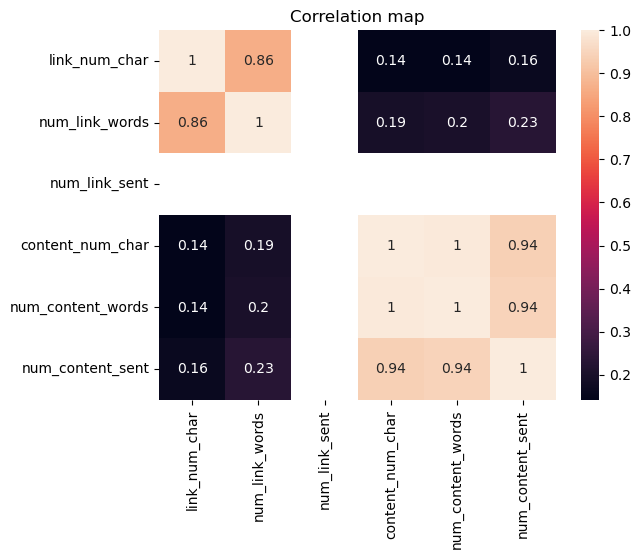

In [138]:
plt.title("Correlation map")
numeric_df = train_df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

- Content word and content char length , content sent length are highly correlated highly correlated
- no of words in links and character are highly correlated
- So we only take one colum from each columns
- Also there is no variation in number of sentences in link. So we going to drop it


In [142]:
ps = PorterStemmer()

In [143]:
def transformation(text):
    # lower text
    text = text.lower()
    # convert into words
    text = nltk.word_tokenize(text)

    # removing special characters
    y = []
    for str_ in text:
        if str_.isalnum():
            y.append(str_)

    text = y.copy()
    y.clear()

    # removing stop words and punctuation
    for str_ in text:
        if str_ not in stopwords.words('english') and str_ not in string.punctuation:
            y.append(str_)

    text = y.copy()
    y.clear()

    # stemming
    for str_ in text:
        y.append(ps.stem(str_))

    return " ".join(y)

## Content Data


In [145]:
train_df['transformed_text'] = train_df['content'].apply(transformation)

In [146]:
train_df['transformed_text'].sample(5)

12     luminair type catalog number multipl layer lig...
24     elit rl617 6 6 led closet light w pir motion s...
692    tfrime secrowse 0015 lmr flexibl low loss comm...
219    columbia bare trentin ee ech connor featu eral...
737    belden product 16944 4 75 ohm sdi coax 18 awg ...
Name: transformed_text, dtype: object

In [147]:
# wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400,
                      min_font_size=10, background_color='white')


In [149]:
train_df['target_col'].value_counts()

target_col
lighting    446
cable       226
others      155
fuses       125
Name: count, dtype: int64

In [150]:
lighting_wc = wordcloud.generate(
    train_df[train_df["target_col"] == 'lighting']['transformed_text'].str.cat(sep=" "))

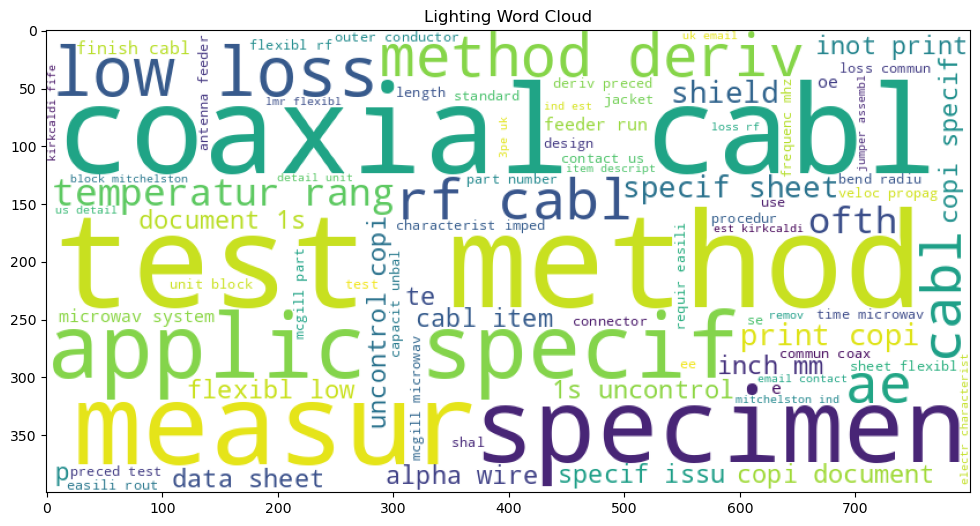

In [154]:
plt.figure(figsize=(15, 6))
plt.imshow(lighting_wc)
plt.title("Lighting Word Cloud")
plt.savefig("Lighting Word Cloud.png")
plt.show()

In [163]:
# finding most frequent words in light category
light_words = []
for msg in train_df[train_df["target_col"] == 'lighting']['transformed_text'].tolist():
    for word in msg.split():
        light_words.append(word)

In [164]:
len(light_words)

88472

In [165]:
from collections import Counter
most_freq_light_words = Counter(light_words).most_common(30)
most_freq_light_words

[('light', 981),
 ('ee', 676),
 ('led', 653),
 ('ae', 548),
 ('2', 511),
 ('product', 508),
 ('te', 387),
 ('se', 365),
 ('select', 365),
 ('0', 341),
 ('mount', 327),
 ('oe', 323),
 ('wac', 320),
 ('locat', 311),
 ('type', 309),
 ('1', 308),
 ('view', 290),
 ('number', 270),
 ('eee', 259),
 ('control', 243),
 ('back', 224),
 ('project', 218),
 ('download', 218),
 ('email', 217),
 ('option', 215),
 ('et', 204),
 ('4', 193),
 ('ship', 191),
 ('specif', 190),
 ('es', 190)]

In [167]:
light_word_df = pd.DataFrame(most_freq_light_words)
light_word_df

,0,1
0,light,981
1,ee,676
2,led,653
3,ae,548
4,2,511
5,product,508
6,te,387
7,se,365
8,select,365
9,0,341


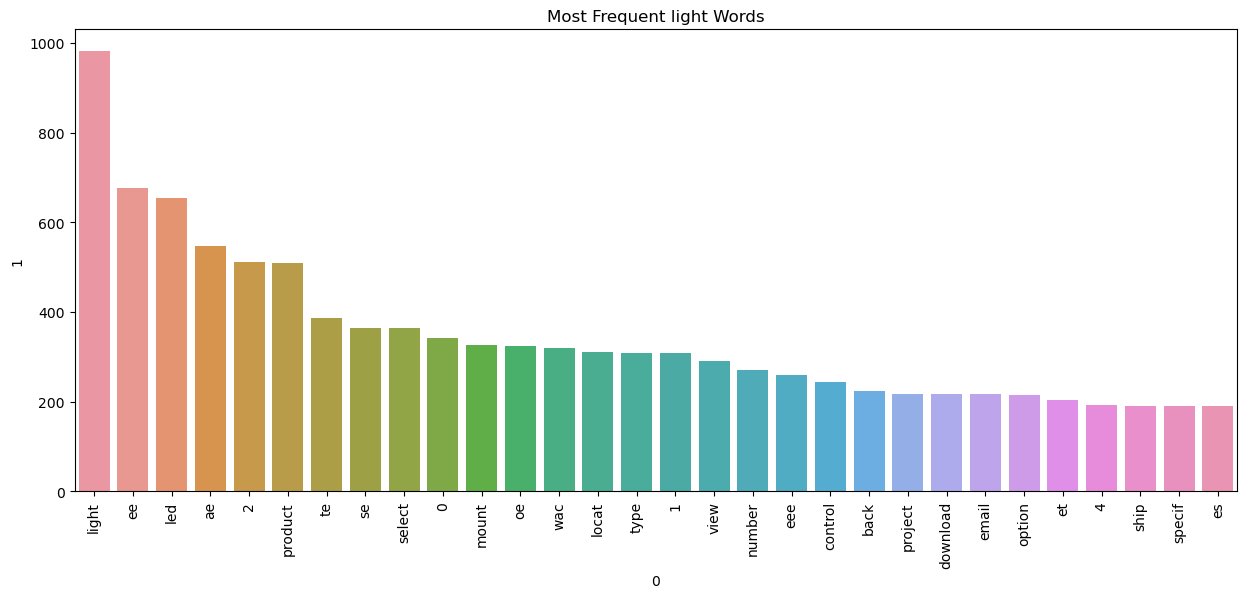

In [168]:

plt.figure(figsize=(15, 6))
plt.title("Most Frequent light Words")
sns.barplot(data=light_word_df, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

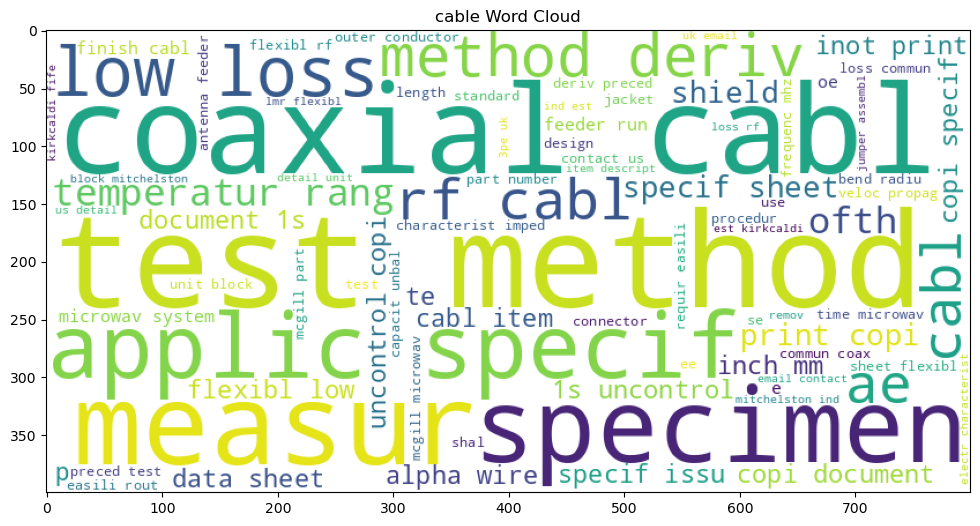

In [152]:
cable_wc = wordcloud.generate(
    train_df[train_df["target_col"] == 'cable']['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(cable_wc)
plt.title("cable Word Cloud")
plt.savefig("cableWord Cloud.png")
plt.show()

In [170]:
# finding most frequent words in cable category
cable_words = []
for msg in train_df[train_df["target_col"] == 'cable']['transformed_text'].tolist():
    for word in msg.split():
        cable_words.append(word)

In [171]:
len(cable_words)

63439

In [173]:
most_freq_cable_words = Counter(cable_words).most_common(30)
most_freq_cable_words

[('cabl', 874),
 ('shall', 598),
 ('specif', 519),
 ('test', 410),
 ('conductor', 338),
 ('method', 272),
 ('1', 267),
 ('2', 258),
 ('applic', 241),
 ('rang', 239),
 ('c', 233),
 ('ofth', 211),
 ('frequenc', 209),
 ('page', 208),
 ('shield', 208),
 ('requir', 203),
 ('specimen', 202),
 ('product', 201),
 ('system', 196),
 ('use', 193),
 ('coaxial', 191),
 ('copi', 188),
 ('0', 185),
 ('te', 183),
 ('lmr', 183),
 ('sheet', 181),
 ('capacit', 176),
 ('100', 173),
 ('loss', 170),
 ('attenu', 169)]

In [174]:
cable_word_df = pd.DataFrame(most_freq_cable_words)
cable_word_df

,0,1
0,cabl,874
1,shall,598
2,specif,519
3,test,410
4,conductor,338
5,method,272
6,1,267
7,2,258
8,applic,241
9,rang,239


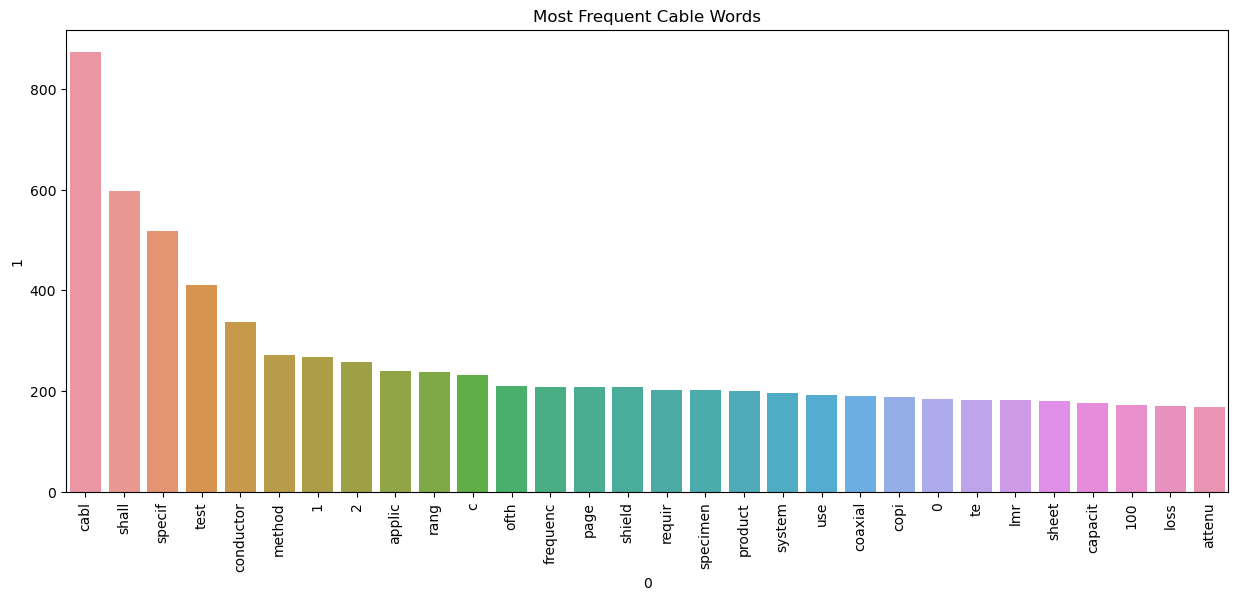

In [177]:

plt.figure(figsize=(15, 6))
plt.title("Most Frequent Cable Words")
sns.barplot(data=cable_word_df, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [179]:
train_df["target_col"].unique()

array(['lighting', 'fuses', 'cable', 'others'], dtype=object)

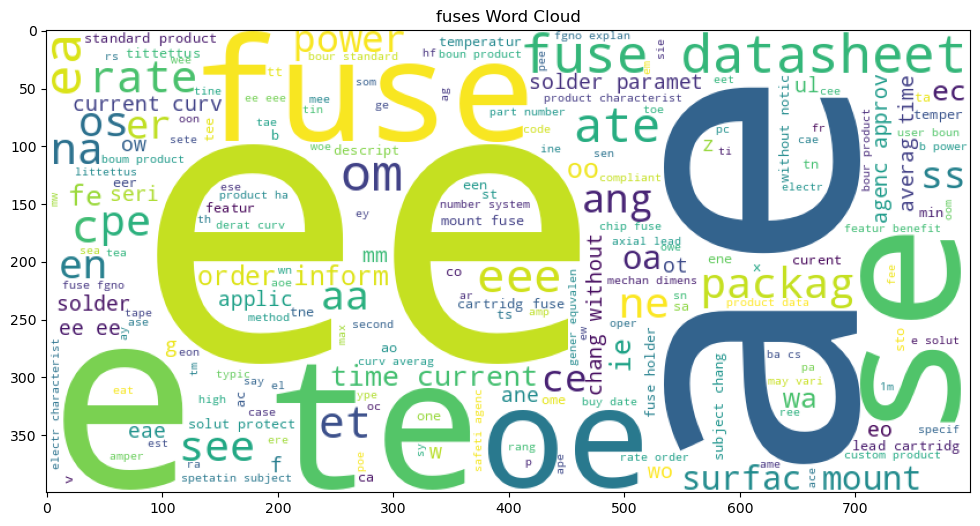

In [180]:
fuses_wc = wordcloud.generate(
    train_df[train_df["target_col"] == 'fuses']['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(cable_wc)
plt.title("fuses Word Cloud")
plt.savefig("fuses Word Cloud.png")
plt.show()

In [181]:
# finding most frequent words in cable category
fuses_words = []
for msg in train_df[train_df["target_col"] == 'fuses']['transformed_text'].tolist():
    for word in msg.split():
        fuses_words.append(word)

In [182]:
len(fuses_words)

44629

In [183]:
most_freq_fuses_words = Counter(fuses_words).most_common(30)
most_freq_fuses_words

[('fuse', 489),
 ('ee', 420),
 ('product', 398),
 ('ae', 331),
 ('1', 290),
 ('use', 226),
 ('te', 223),
 ('2', 220),
 ('se', 191),
 ('oe', 179),
 ('4', 155),
 ('om', 150),
 ('0', 150),
 ('seri', 142),
 ('datasheet', 142),
 ('applic', 141),
 ('protect', 138),
 ('type', 134),
 ('rate', 134),
 ('eee', 133),
 ('time', 132),
 ('na', 130),
 ('es', 130),
 ('ea', 128),
 ('standard', 127),
 ('solder', 124),
 ('curv', 122),
 ('bour', 120),
 ('er', 119),
 ('power', 116)]

In [184]:
fuses_word_df = pd.DataFrame(most_freq_fuses_words)
fuses_word_df

,0,1
0,fuse,489
1,ee,420
2,product,398
3,ae,331
4,1,290
5,use,226
6,te,223
7,2,220
8,se,191
9,oe,179


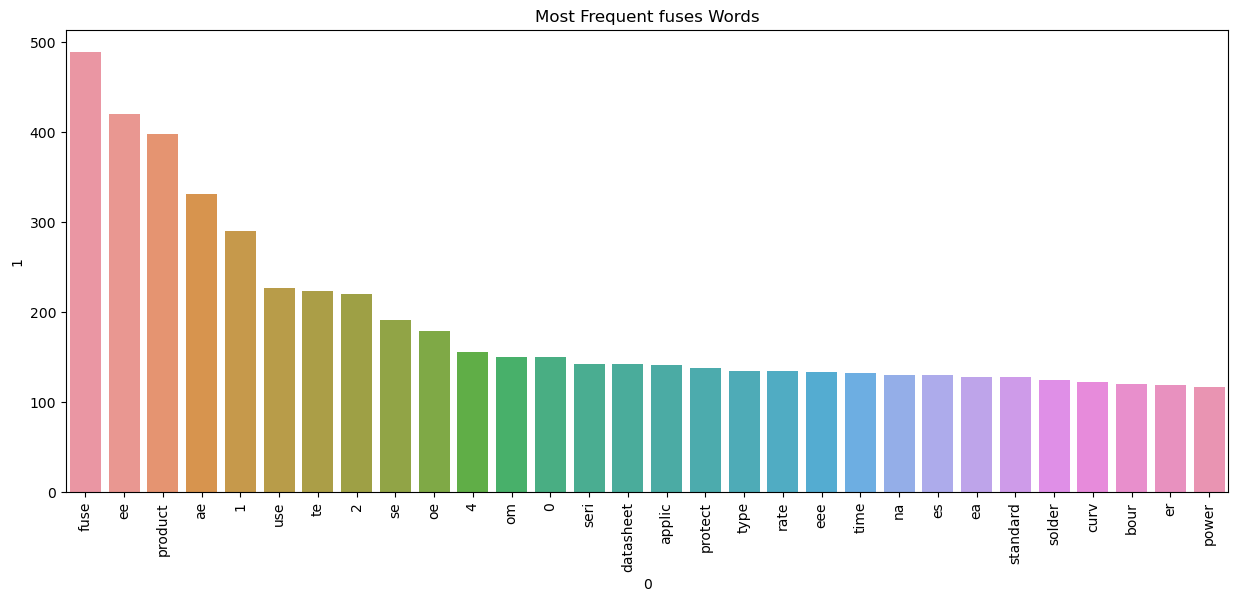

In [185]:

plt.figure(figsize=(15, 6))
plt.title("Most Frequent fuses Words")
sns.barplot(data=fuses_word_df, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

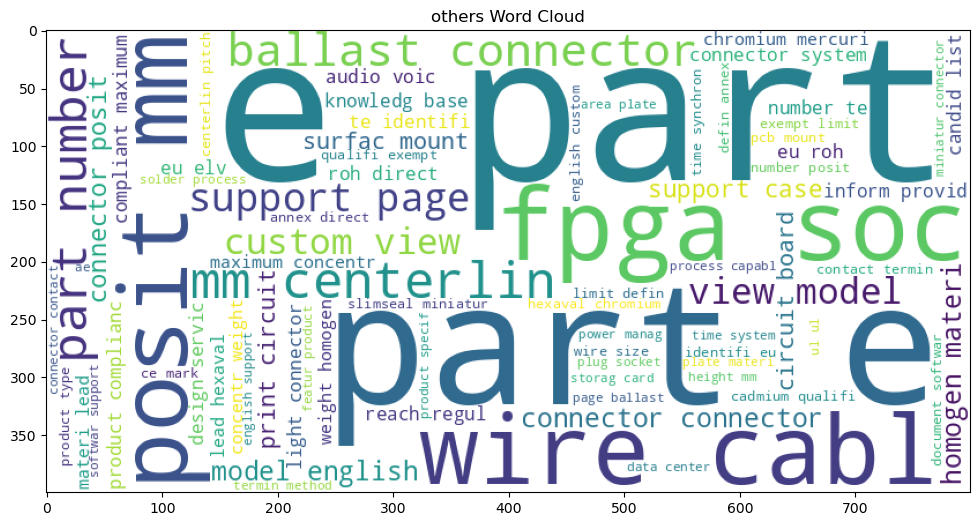

In [186]:
others_wc = wordcloud.generate(
    train_df[train_df["target_col"] == 'others']['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(cable_wc)
plt.title("others Word Cloud")
plt.savefig("others Word Cloud.png")
plt.show()

In [187]:
# finding most frequent words in cable category
others_words = []
for msg in train_df[train_df["target_col"] == 'others']['transformed_text'].tolist():
    for word in msg.split():
        others_words.append(word)

In [188]:
len(others_words)

80147

In [189]:
most_freq_others_words = Counter(others_words).most_common(30)
most_freq_others_words

[('connector', 2003),
 ('product', 1137),
 ('part', 975),
 ('contact', 834),
 ('wire', 677),
 ('support', 674),
 ('2', 621),
 ('mm', 611),
 ('system', 553),
 ('english', 533),
 ('e', 531),
 ('featur', 521),
 ('posit', 511),
 ('number', 466),
 ('page', 457),
 ('te', 450),
 ('mount', 446),
 ('power', 423),
 ('servic', 418),
 ('direct', 415),
 ('materi', 409),
 ('centerlin', 396),
 ('cabl', 394),
 ('3', 390),
 ('termin', 378),
 ('document', 376),
 ('custom', 374),
 ('4', 364),
 ('1', 357),
 ('inform', 356)]

In [190]:
others_word_df = pd.DataFrame(most_freq_others_words)
others_word_df

,0,1
0,connector,2003
1,product,1137
2,part,975
3,contact,834
4,wire,677
5,support,674
6,2,621
7,mm,611
8,system,553
9,english,533


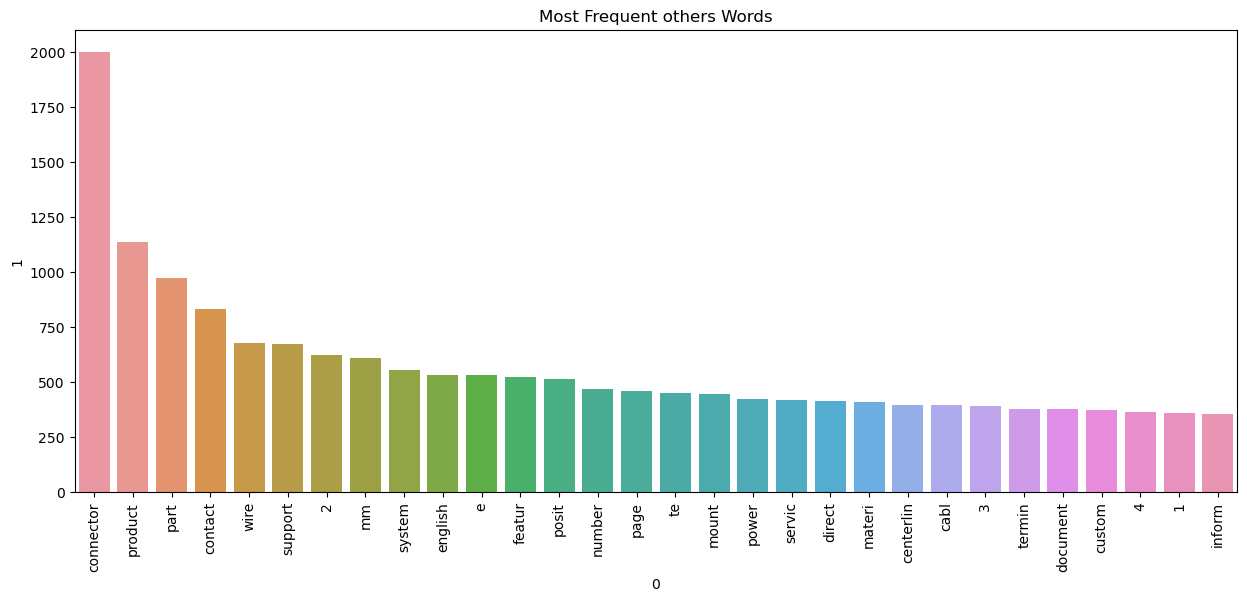

In [191]:

plt.figure(figsize=(15, 6))
plt.title("Most Frequent others Words")
sns.barplot(data=others_word_df, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

## Url Links Data


In [192]:
train_df.head()

,datasheet_link,target_col,content,datasheet_link_processed,link_num_char,num_link_words,num_link_sent,content_num_char,num_content_words,num_content_sent,transformed_text
0,https://lfillumination.com/files/specsheets/EF...,lighting,| ILLUMINATION Magnate Moun ...,lfillumination.com files specsheets EF408B-Lig...,65,3,1,350,53,2,illumin magnat moun freten tock 2804 ey 75109 ...
2,https://lfillumination.com/files/specsheets/EF...,lighting,| EF400 System # EF407B . DIE CAST CYLINDRICAL...,lfillumination.com files specsheets EF407B-Lig...,65,3,1,475,82,3,ef400 system ef407b die cast cylindr light uni...
3,https://www.waclighting.com/storage/waclightin...,lighting,ADJUSTABLE BEAM WALL WASH 12V 5221 vba alight ...,storage waclighting-images specsheet_pdf 5221_...,83,3,1,935,153,3,adjust beam wall wash 12v 5221 vba alight ns s...
4,https://www.acuitybrands.com/api/products/geta...,lighting,HEALTHCARE mons Wa LIGHTING. | HDMC Surface Mo...,api products getasset healthcare-lighting 1626...,184,15,1,5106,973,14,healthcar mon wa light hdmc surfac mount filte...
6,https://lfillumination.com/files/specsheets/KA...,lighting,iF KATRPB CYLINDER PENDANT MOUNT ILLUMINATION ...,lfillumination.com files specsheets KATRPB-Pen...,62,3,1,379,77,2,katrpb cylind pendant mount illumin integr dri...


In [194]:
train_df['transformed_link'] =  train_df['datasheet_link_processed'].apply(transformation)

In [195]:
train_df['transformed_link'].sample(5)

104                              specsheet2
374                      product 1676607621
692                          upload 2022 03
1025    commerc documentdeliveri ddecontrol
554                                     doc
Name: transformed_link, dtype: object

In [196]:
# wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400,
                      min_font_size=10, background_color='white')


In [197]:
train_df['target_col'].value_counts()

target_col
lighting    446
cable       226
others      155
fuses       125
Name: count, dtype: int64

In [198]:
lighting_wc = wordcloud.generate(
    train_df[train_df["target_col"] == 'lighting']['transformed_link'].str.cat(sep=" "))

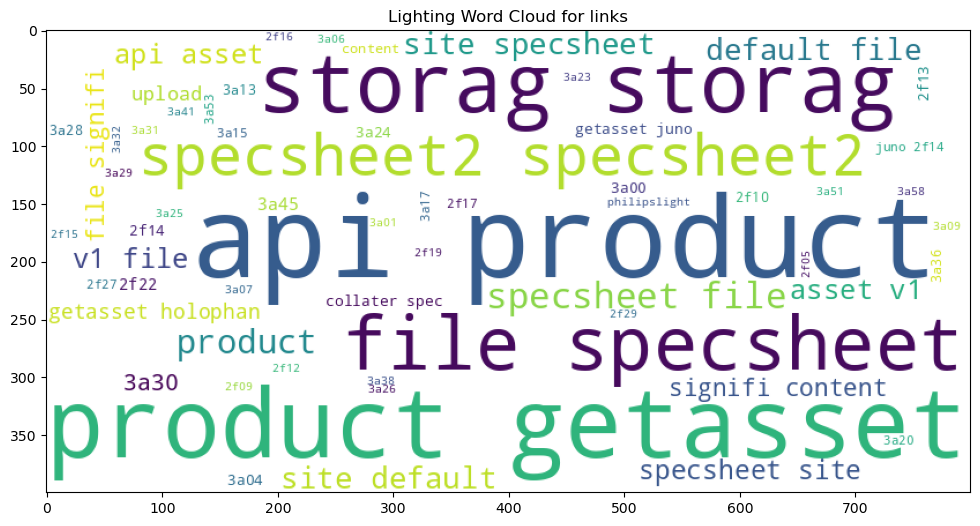

In [199]:
plt.figure(figsize=(15, 6))
plt.imshow(lighting_wc)
plt.title("Lighting Word Cloud for links")
plt.savefig("Lighting Word Cloud links.png")
plt.show()

In [201]:
# finding most frequent words in light category links
light_words = []
for msg in train_df[train_df["target_col"] == 'lighting']['transformed_link'].tolist():
    for word in msg.split():
        light_words.append(word)

In [202]:
len(light_words)

1325

In [204]:
from collections import Counter
most_freq_light_link_words = Counter(light_words).most_common(30)
most_freq_light_link_words

[('product', 186),
 ('api', 99),
 ('file', 90),
 ('storag', 81),
 ('getasset', 79),
 ('specsheet', 73),
 ('specsheet2', 50),
 ('site', 46),
 ('default', 23),
 ('asset', 20),
 ('v1', 20),
 ('content', 20),
 ('signifi', 15),
 ('3a30', 14),
 ('holophan', 11),
 ('2f14', 10),
 ('upload', 10),
 ('3a45', 8),
 ('2f22', 7),
 ('juno', 6),
 ('2f13', 6),
 ('3a24', 6),
 ('3a00', 6),
 ('collater', 6),
 ('spec', 6),
 ('3a04', 6),
 ('3a13', 5),
 ('3a28', 5),
 ('3a36', 5),
 ('2f10', 5)]

In [205]:
light_word_df = pd.DataFrame(most_freq_light_link_words)
light_word_df

,0,1
0,product,186
1,api,99
2,file,90
3,storag,81
4,getasset,79
5,specsheet,73
6,specsheet2,50
7,site,46
8,default,23
9,asset,20


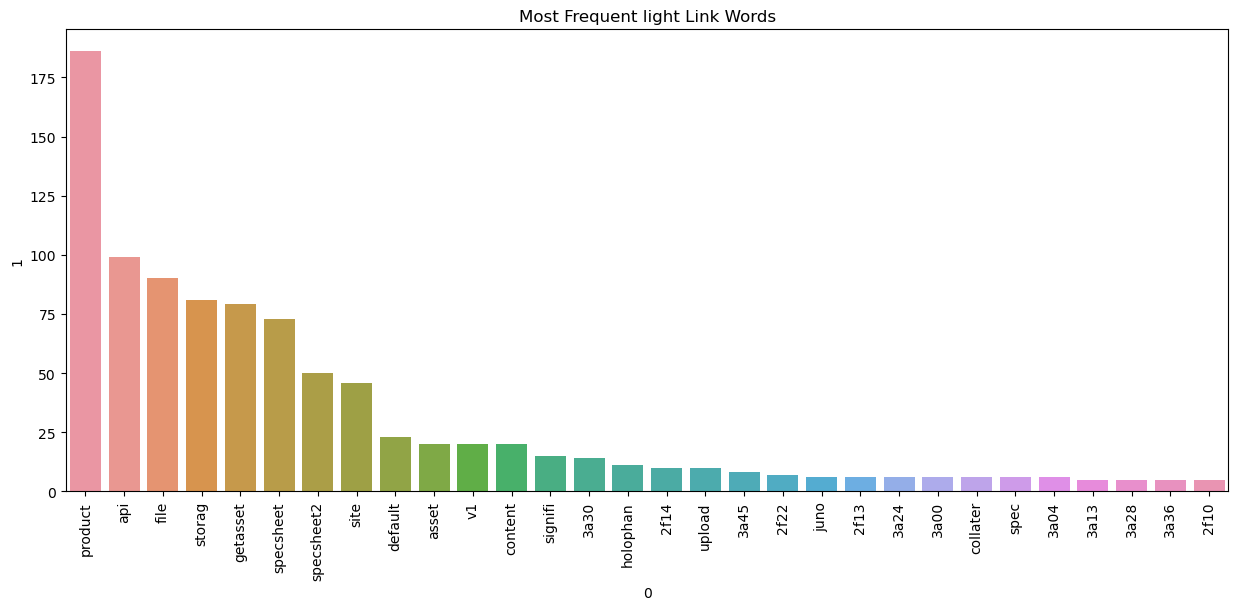

In [206]:

plt.figure(figsize=(15, 6))
plt.title("Most Frequent light Link Words")
sns.barplot(data=light_word_df, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

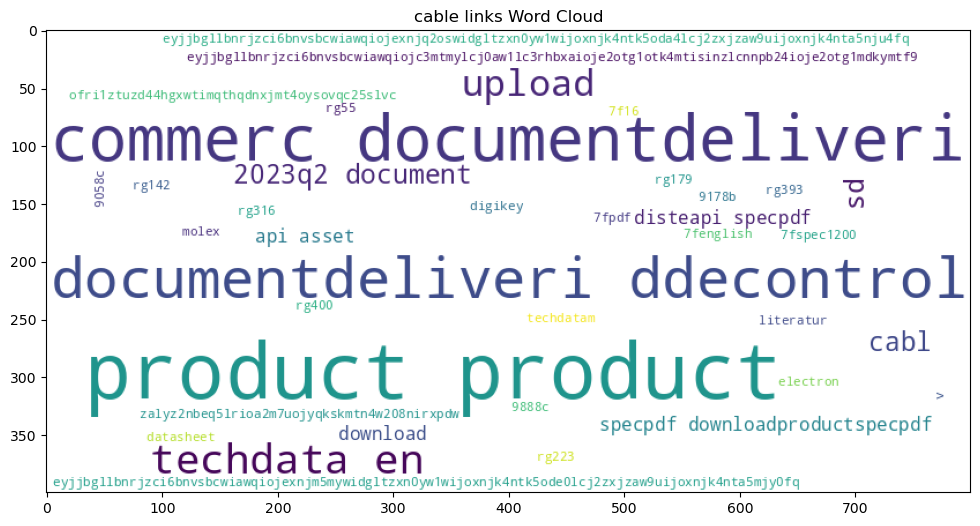

In [207]:
cable_wc = wordcloud.generate(
    train_df[train_df["target_col"] == 'cable']['transformed_link'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(cable_wc)
plt.title("cable links Word Cloud")
plt.savefig("cableWord links Cloud.png")
plt.show()

In [209]:
# finding most frequent words in cable links category
cable_words = []
for msg in train_df[train_df["target_col"] == 'cable']['transformed_link'].tolist():
    for word in msg.split():
        cable_words.append(word)

In [210]:
len(cable_words)

634

In [211]:
most_freq_cable_words = Counter(cable_words).most_common(30)
most_freq_cable_words

[('product', 77),
 ('commerc', 41),
 ('documentdeliveri', 41),
 ('ddecontrol', 41),
 ('2022', 33),
 ('techdata', 20),
 ('en', 20),
 ('upload', 16),
 ('4', 14),
 ('2023', 13),
 ('7', 11),
 ('03', 10),
 ('1', 9),
 ('11', 9),
 ('5', 8),
 ('25', 8),
 ('2023q2', 7),
 ('document', 7),
 ('6', 7),
 ('cabl', 7),
 ('sd', 7),
 ('48', 6),
 ('9', 6),
 ('10', 6),
 ('2', 6),
 ('06', 5),
 ('0', 5),
 ('21', 5),
 ('20', 5),
 ('8', 4)]

In [212]:
cable_word_df = pd.DataFrame(most_freq_cable_words)
cable_word_df

,0,1
0,product,77
1,commerc,41
2,documentdeliveri,41
3,ddecontrol,41
4,2022,33
5,techdata,20
6,en,20
7,upload,16
8,4,14
9,2023,13


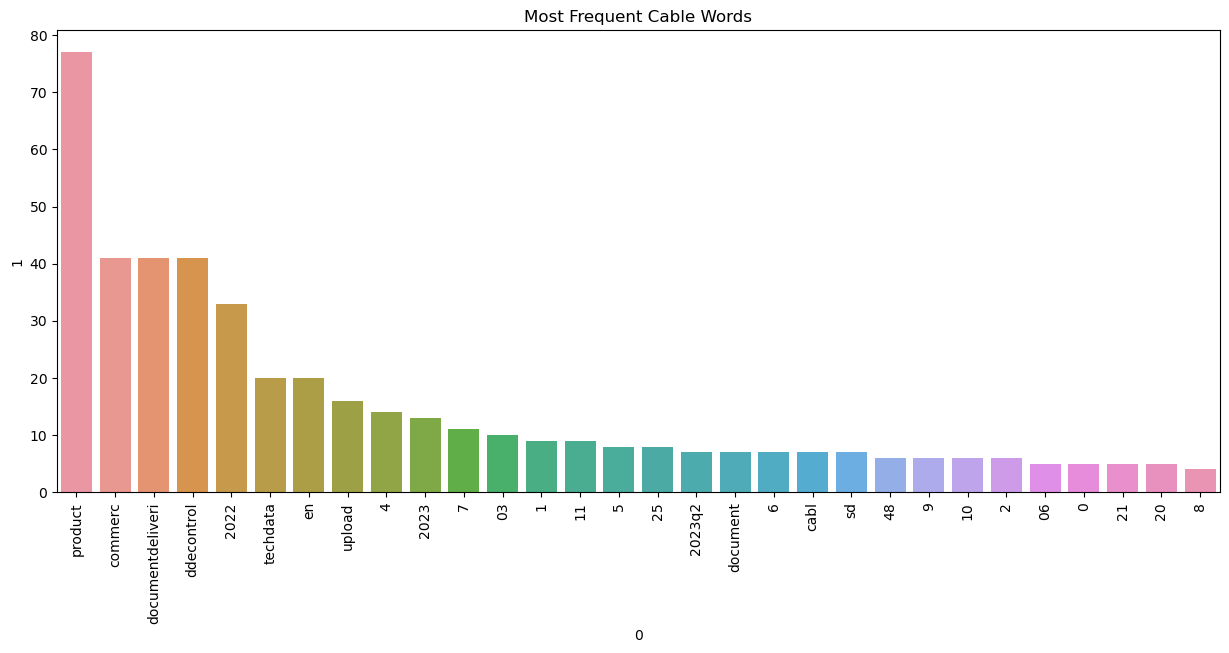

In [213]:

plt.figure(figsize=(15, 6))
plt.title("Most Frequent Cable Words")
sns.barplot(data=cable_word_df, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
train_df["target_col"].unique()

array(['lighting', 'fuses', 'cable', 'others'], dtype=object)

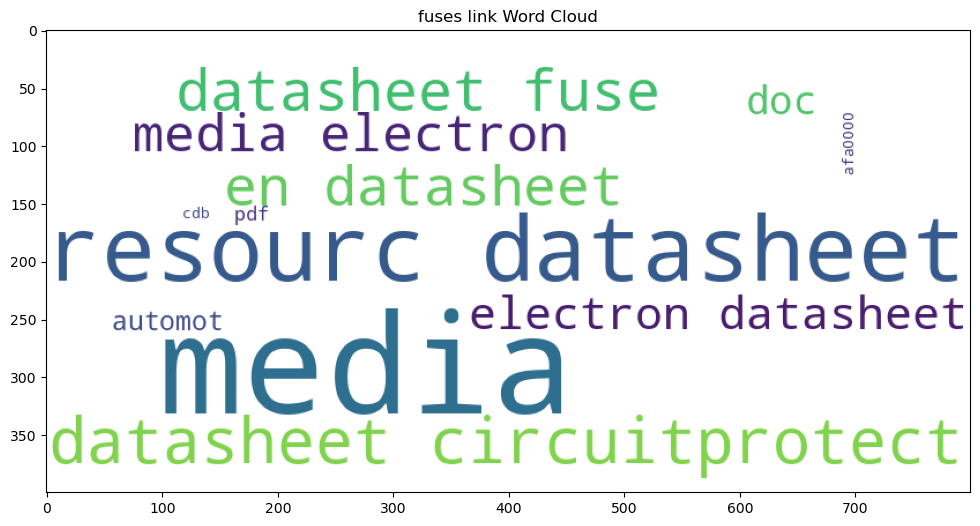

In [214]:
fuses_wc = wordcloud.generate(
    train_df[train_df["target_col"] == 'fuses']['transformed_link'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(cable_wc)
plt.title("fuses link Word Cloud")
plt.savefig("fuses links Word Cloud.png")
plt.show()

In [216]:
# finding most frequent words in cable links category
fuses_words = []
for msg in train_df[train_df["target_col"] == 'fuses']['transformed_link'].tolist():
    for word in msg.split():
        fuses_words.append(word)

In [218]:
len(fuses_words)

254

In [219]:
most_freq_fuses_words = Counter(fuses_words).most_common(30)
most_freq_fuses_words

[('media', 67),
 ('datasheet', 63),
 ('resourc', 25),
 ('circuitprotect', 25),
 ('fuse', 20),
 ('en', 18),
 ('electron', 16),
 ('doc', 11),
 ('automot', 4),
 ('pdf', 2),
 ('28747', 1),
 ('cdb', 1),
 ('afa0000', 1)]

In [220]:
fuses_word_df = pd.DataFrame(most_freq_fuses_words)
fuses_word_df

,0,1
0,media,67
1,datasheet,63
2,resourc,25
3,circuitprotect,25
4,fuse,20
5,en,18
6,electron,16
7,doc,11
8,automot,4
9,pdf,2


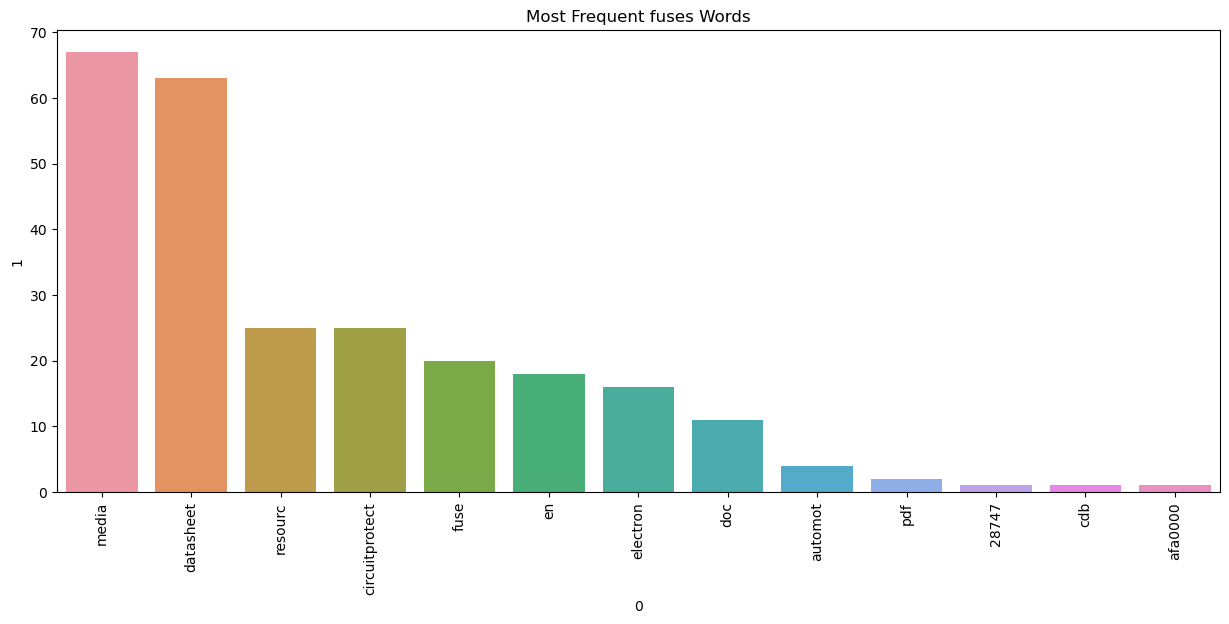

In [221]:

plt.figure(figsize=(15, 6))
plt.title("Most Frequent fuses Words")
sns.barplot(data=fuses_word_df, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

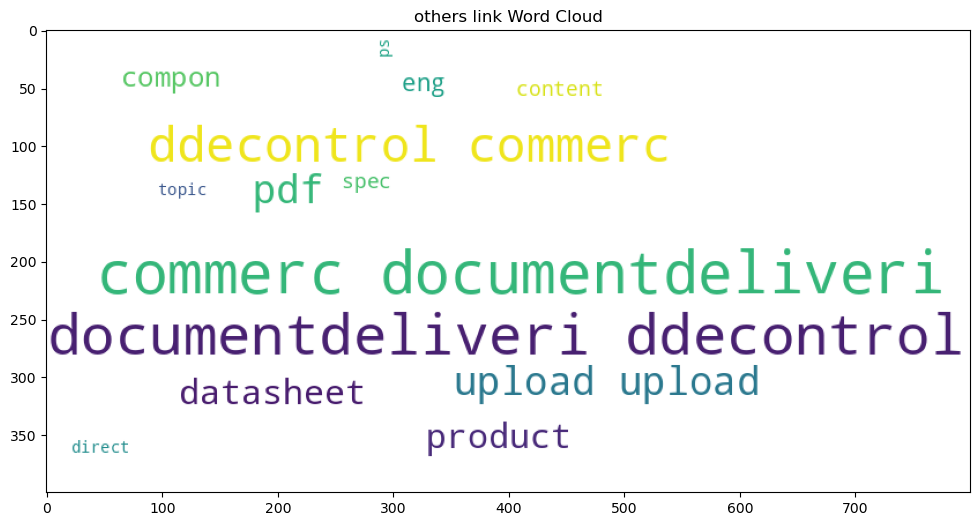

In [222]:
others_wc = wordcloud.generate(
    train_df[train_df["target_col"] == 'others']['transformed_link'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(cable_wc)
plt.title("others link Word Cloud")
plt.savefig("others link Word Cloud.png")
plt.show()

In [223]:
# finding most frequent words in others links category
others_words = []
for msg in train_df[train_df["target_col"] == 'others']['transformed_link'].tolist():
    for word in msg.split():
        others_words.append(word)

In [224]:
len(others_words)

140

In [225]:
most_freq_others_words = Counter(others_words).most_common(30)
most_freq_others_words

[('commerc', 21),
 ('documentdeliveri', 21),
 ('ddecontrol', 21),
 ('upload', 13),
 ('pdf', 9),
 ('product', 7),
 ('datasheet', 7),
 ('2016', 6),
 ('2021', 5),
 ('04', 5),
 ('compon', 4),
 ('eng', 3),
 ('08', 3),
 ('content', 2),
 ('spec', 2),
 ('direct', 1),
 ('topic', 1),
 ('ps', 1),
 ('1', 1),
 ('6', 1),
 ('0', 1),
 ('36', 1),
 ('50', 1),
 ('886', 1),
 ('07', 1),
 ('01', 1)]

In [226]:
others_word_df = pd.DataFrame(most_freq_others_words)
others_word_df

,0,1
0,commerc,21
1,documentdeliveri,21
2,ddecontrol,21
3,upload,13
4,pdf,9
5,product,7
6,datasheet,7
7,2016,6
8,2021,5
9,04,5


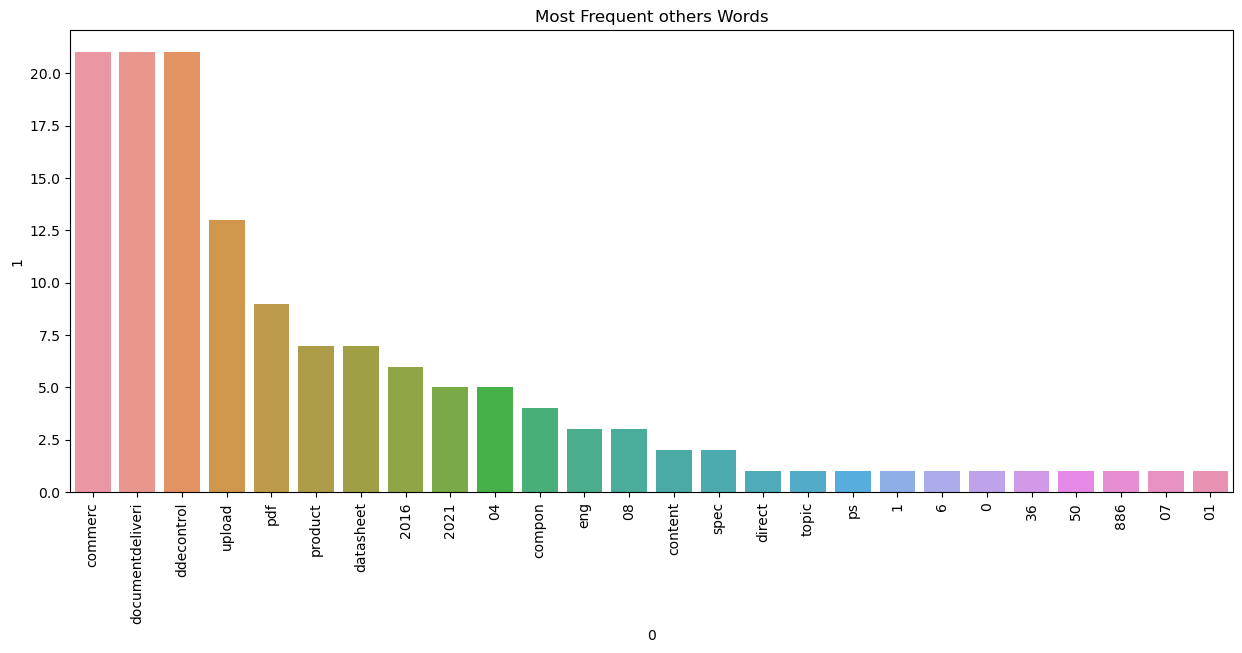

In [227]:

plt.figure(figsize=(15, 6))
plt.title("Most Frequent others Words")
sns.barplot(data=others_word_df, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [229]:
train_df.to_csv('train_df_for_model_v1.csv',index=False)